In [2]:
pip install opencv-python


In [3]:
import cv2
import os

def extract_frames(video_path, output_folder, fps=10):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Get the original frames per second (fps) of the video
    original_fps = video_capture.get(cv2.CAP_PROP_FPS)

    # Calculate the frame interval based on desired FPS
    frame_interval = int(original_fps // fps)

    frame_count = 0
    extracted_count = 0

    # Ensure output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through the video
    while video_capture.isOpened():
        success, frame = video_capture.read()

        if not success:
            break

        # Save every nth frame (based on desired fps)
        if frame_count % frame_interval == 0:
            frame_name = os.path.join(output_folder, f"frame_{extracted_count}.jpg")
            cv2.imwrite(frame_name, frame)
            extracted_count += 1

        frame_count += 1

    video_capture.release()
    print(f"Extracted {extracted_count} frames at {fps} FPS.")

# Example usage
video_path = 'Intersection.mp4'  # Path to the input video
output_folder = 'extracted_frames'  # Folder to save frames
extract_frames(video_path, output_folder, fps=10)


Extracted 92 frames at 10 FPS.


In [4]:
pip install opencv-python pillow


In [5]:
import cv2
import os
import numpy as np
from PIL import Image, ImageEnhance

# Function to apply Gaussian filtering
def apply_gaussian_filter(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Function to apply contrast enhancement
def apply_contrast_enhancement(image):
    pil_img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to PIL image for enhancement
    enhancer = ImageEnhance.Contrast(pil_img)
    enhanced_img = enhancer.enhance(2)  # Increase contrast by a factor of 2
    return cv2.cvtColor(np.array(enhanced_img), cv2.COLOR_RGB2BGR)  # Convert back to OpenCV format

# Function to augment image (flip & rotate)
def augment_image(image):
    flipped_img = cv2.flip(image, 1)  # Flip horizontally
    rotated_img = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)  # Rotate 90 degrees clockwise
    return flipped_img, rotated_img

# Function to process and save images
def process_images(input_folder, gaussian_folder, contrast_folder, augment_folder):
    if not os.path.exists(gaussian_folder):
        os.makedirs(gaussian_folder)
    if not os.path.exists(contrast_folder):
        os.makedirs(contrast_folder)
    if not os.path.exists(augment_folder):
        os.makedirs(augment_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path)

            # Apply Gaussian filtering
            gaussian_image = apply_gaussian_filter(image)
            gaussian_image_path = os.path.join(gaussian_folder, filename)
            cv2.imwrite(gaussian_image_path, gaussian_image)

            # Apply contrast enhancement
            contrast_image = apply_contrast_enhancement(image)
            contrast_image_path = os.path.join(contrast_folder, filename)
            cv2.imwrite(contrast_image_path, contrast_image)

            # Apply data augmentation (flip and rotate)
            flipped_image, rotated_image = augment_image(image)
            flipped_image_path = os.path.join(augment_folder, f"flipped_{filename}")
            rotated_image_path = os.path.join(augment_folder, f"rotated_{filename}")
            cv2.imwrite(flipped_image_path, flipped_image)
            cv2.imwrite(rotated_image_path, rotated_image)

    print("Processing completed. Images are saved in their respective folders.")

# Example usage
input_folder = 'extracted_frames'  # Folder containing the original 93 frames
gaussian_folder = 'gaussian_filtered_frames'  # Folder to store Gaussian filtered images
contrast_folder = 'contrast_enhanced_frames'  # Folder to store contrast enhanced images
augment_folder = 'augmented_frames'  # Folder to store flipped & rotated images

process_images(input_folder, gaussian_folder, contrast_folder, augment_folder)


Processing completed. Images are saved in their respective folders.


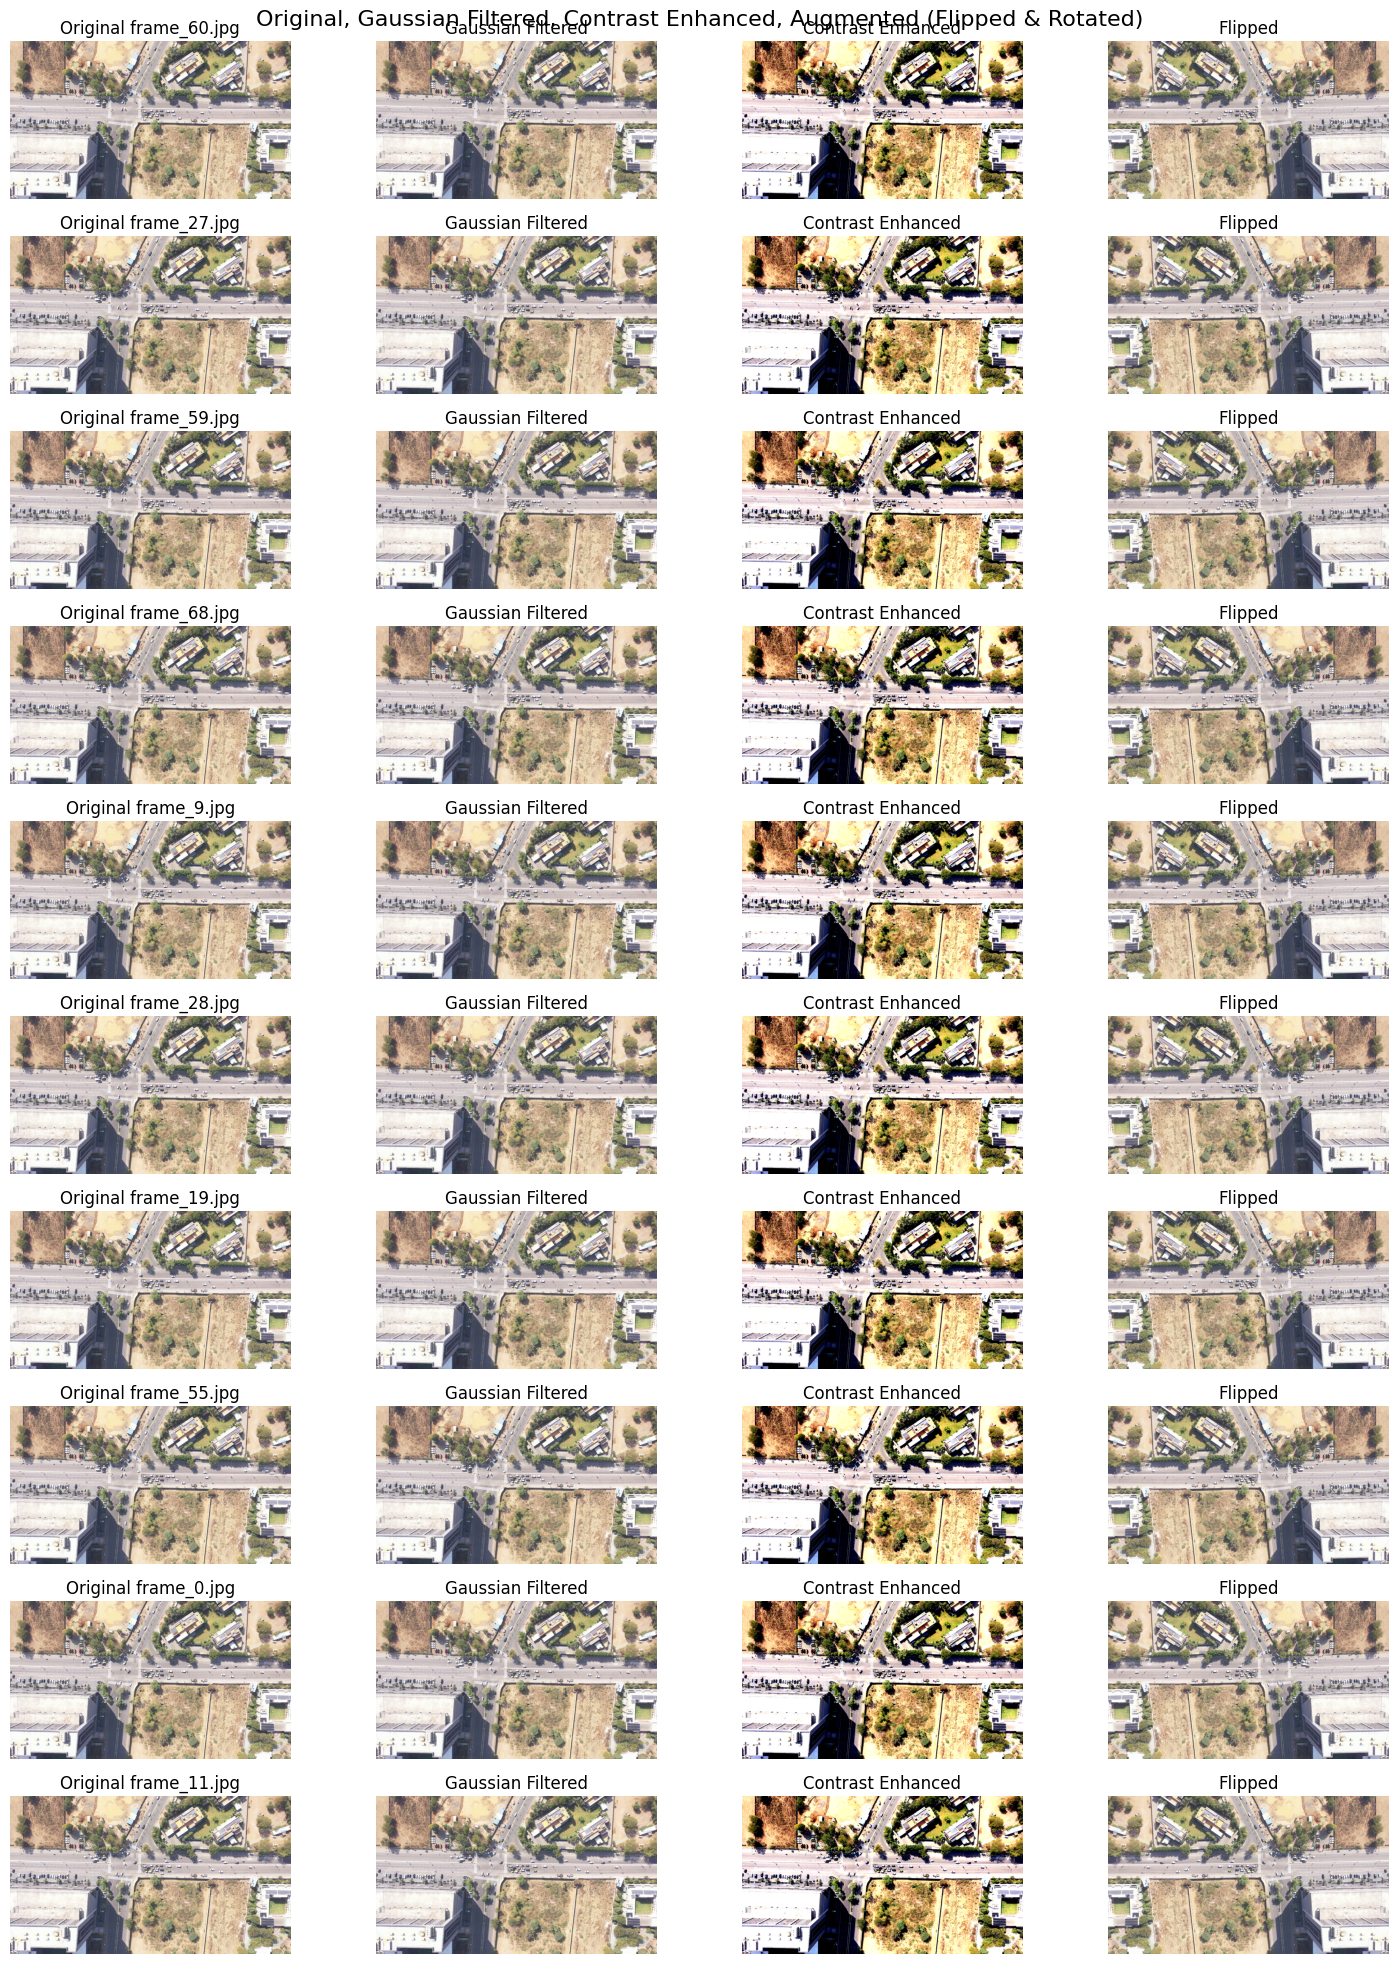

In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

# Function to apply Gaussian filtering
def apply_gaussian_filter(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Function to apply contrast enhancement
def apply_contrast_enhancement(image):
    pil_img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to PIL image for enhancement
    enhancer = ImageEnhance.Contrast(pil_img)
    enhanced_img = enhancer.enhance(2)  # Increase contrast by a factor of 2
    return cv2.cvtColor(np.array(enhanced_img), cv2.COLOR_RGB2BGR)  # Convert back to OpenCV format

# Function to augment image (flip & rotate)
def augment_image(image):
    flipped_img = cv2.flip(image, 1)  # Flip horizontally
    rotated_img = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)  # Rotate 90 degrees clockwise
    return flipped_img, rotated_img

# Function to display images
def display_images(input_folder, num_images=10):
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))][:num_images]

    # Set up the plot grid (10 rows, 4 columns)
    fig, axes = plt.subplots(num_images, 4, figsize=(15, 20))
    fig.suptitle('Original, Gaussian Filtered, Contrast Enhanced, Augmented (Flipped & Rotated)', fontsize=16)

    for i, filename in enumerate(image_files):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Apply Gaussian filtering
        gaussian_image = apply_gaussian_filter(image)

        # Apply contrast enhancement
        contrast_image = apply_contrast_enhancement(image)

        # Apply data augmentation (flip and rotate)
        flipped_image, rotated_image = augment_image(image)

        # Display the original image
        axes[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title(f"Original {filename}")
        axes[i, 0].axis('off')

        # Display the Gaussian filtered image
        axes[i, 1].imshow(cv2.cvtColor(gaussian_image, cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title("Gaussian Filtered")
        axes[i, 1].axis('off')

        # Display the contrast enhanced image
        axes[i, 2].imshow(cv2.cvtColor(contrast_image, cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title("Contrast Enhanced")
        axes[i, 2].axis('off')

        # Display the augmented images (flip & rotate)
        axes[i, 3].imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
        axes[i, 3].set_title("Flipped")
        axes[i, 3].axis('off')

        # Display the rotated image in the next row
        if i == num_images - 1:  # Prevent overflow for 10 rows
            fig.tight_layout()
            plt.show()

    # Adjust layout and display the final image grid
    fig.tight_layout(rect=[0, 0, 1, 0.97])  # Space for the main title
    plt.show()

# Example usage
input_folder = 'extracted_frames'  # Folder containing the original 93 frames
display_images(input_folder, num_images=10)


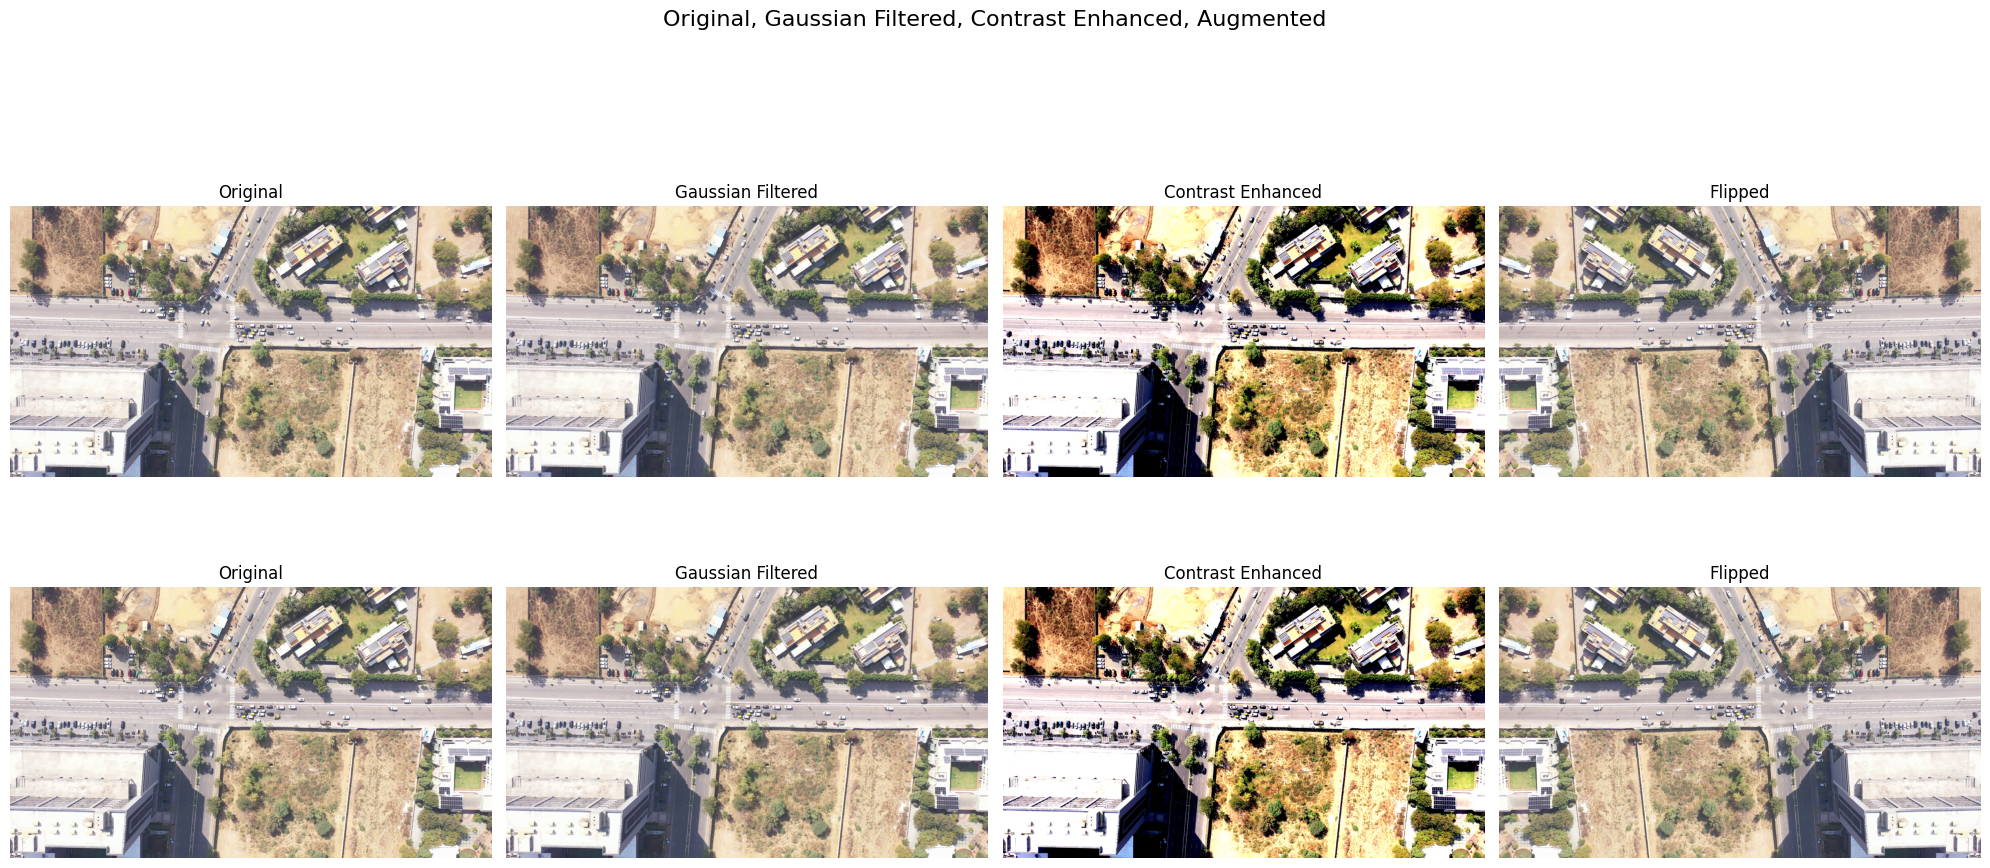

In [7]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to display images
def display_images(input_folder, gaussian_folder, contrast_folder, augment_folder, num_images=2):
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))][:num_images]

    # Set up the plot grid (2 rows, 4 columns)
    fig, axes = plt.subplots(num_images, 4, figsize=(20, 10))  # Increased figure size for larger display
    fig.suptitle('Original, Gaussian Filtered, Contrast Enhanced, Augmented', fontsize=16)

    for i, filename in enumerate(image_files):
        # Load original, gaussian filtered, contrast enhanced, and augmented (flipped) images
        original_image = cv2.imread(os.path.join(input_folder, filename))
        gaussian_image = cv2.imread(os.path.join(gaussian_folder, filename))
        contrast_image = cv2.imread(os.path.join(contrast_folder, filename))
        flipped_image = cv2.imread(os.path.join(augment_folder, f"flipped_{filename}"))

        # Display original image
        axes[i, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title("Original")
        axes[i, 0].axis('off')

        # Display Gaussian filtered image
        axes[i, 1].imshow(cv2.cvtColor(gaussian_image, cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title("Gaussian Filtered")
        axes[i, 1].axis('off')

        # Display contrast enhanced image
        axes[i, 2].imshow(cv2.cvtColor(contrast_image, cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title("Contrast Enhanced")
        axes[i, 2].axis('off')

        # Display augmented (flipped) image
        axes[i, 3].imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
        axes[i, 3].set_title("Flipped")
        axes[i, 3].axis('off')

    # Adjust layout and show the images
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage
input_folder = 'extracted_frames'  # Folder containing the original 93 frames
gaussian_folder = 'gaussian_filtered_frames'  # Folder to store Gaussian filtered images
contrast_folder = 'contrast_enhanced_frames'  # Folder to store contrast enhanced images
augment_folder = 'augmented_frames'  # Folder to store augmented (flipped) images

display_images(input_folder, gaussian_folder, contrast_folder, augment_folder, num_images=2)


In [8]:
pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 15.1 MB/s eta 0:00:00



0: 384x640 7 cars, 1 truck, 122.1ms
Speed: 3.8ms preprocess, 122.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


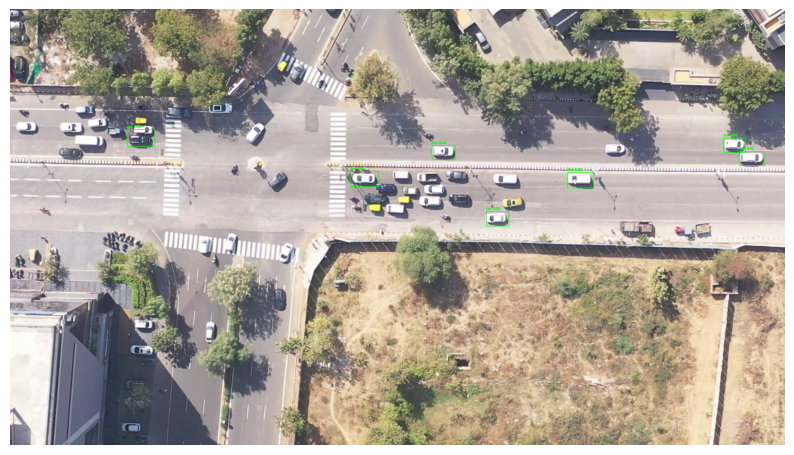

In [12]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Function to zoom into the image
def zoom_image(image, zoom_factor=1.5):
    # Get dimensions
    height, width = image.shape[:2]

    # Calculate the new dimensions
    new_width = int(width / zoom_factor)
    new_height = int(height / zoom_factor)

    # Calculate cropping coordinates
    x1 = (width - new_width) // 2
    y1 = (height - new_height) // 2
    x2 = x1 + new_width
    y2 = y1 + new_height

    # Crop the image to zoom
    cropped_image = image[y1:y2, x1:x2]

    # Resize the image back to the original size
    zoomed_image = cv2.resize(cropped_image, (width, height), interpolation=cv2.INTER_LINEAR)

    return zoomed_image

# Function to detect cars in an image using YOLOv8
def detect_cars(image, model):
    # Run YOLOv8 inference
    results = model(image)

    # Filter detections to include only 'car' (class 2 in COCO dataset)
    detections = results[0].boxes.data.cpu().numpy()  # Get detections as numpy array
    car_detections = [det for det in detections if int(det[5]) == 2]  # Filter for cars (class_id = 2)

    # Draw bounding boxes for cars
    for det in car_detections:
        x1, y1, x2, y2, conf, class_id = map(int, det[:6])  # Get box coordinates and confidence
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"Car {conf:.2f}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

# Load YOLOv8 model (YOLOv8n is a lightweight version, replace 'n' with 's', 'm', or 'l' for bigger models)
model = YOLO('yolov8n.pt')

# Example usage
input_folder = 'extracted_frames'  # Folder containing the original 93 frames
image_file = 'frame_0.jpg'  # Example image

# Load the image
image_path = f"{input_folder}/{image_file}"
image = cv2.imread(image_path)

# Zoom the image
zoomed_image = zoom_image(image, zoom_factor=2)

# Detect cars in the zoomed image
result_image = detect_cars(zoomed_image, model)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
